# Import dependencies

In [2]:
import numpy as np # used for algebra operations
import pandas as pd # Data procesing
import seaborn as sns # statistical data visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Import dataset

In [3]:
df = pd.read_csv('./data/data_2015.csv')
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON
0,29/03/2015 00:00,8,20.0,38.0,17,NaN,31,18
1,29/03/2015 01:00,6,21.0,14.0,14,NaN,20,13
2,29/03/2015 02:00,1,13.0,6.0,11,NaN,24,10
3,29/03/2015 03:00,3,10.0,6.0,11,NaN,10,9
4,29/03/2015 04:00,1,6.0,4.0,4,NaN,11,3


In [4]:
# Describe our dataset
df.describe()

/home/jotase/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON
count,6672.000000,6654.000000,6643.000000,6672.000000,3750.000000,6672.000000,6672.000000
mean,127.395084,70.734896,73.154900,69.884442,51.014400,126.440947,105.830036
std,162.141802,73.060974,75.088782,87.033774,52.454487,137.420884,108.762720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,NaN,NaN,9.000000,NaN,18.000000,11.000000
50%,84.000000,NaN,NaN,47.000000,NaN,100.000000,89.000000
75%,169.000000,NaN,NaN,85.000000,NaN,170.000000,153.000000
max,948.000000,381.000000,538.000000,506.000000,290.000000,754.000000,556.000000


In [5]:
# normalize columns
df = df.rename(index=str, columns={"MARÍN": "MARIN"})
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON
0,29/03/2015 00:00,8,20.0,38.0,17,NaN,31,18
1,29/03/2015 01:00,6,21.0,14.0,14,NaN,20,13
2,29/03/2015 02:00,1,13.0,6.0,11,NaN,24,10
3,29/03/2015 03:00,3,10.0,6.0,11,NaN,10,9
4,29/03/2015 04:00,1,6.0,4.0,4,NaN,11,3


In [6]:
# MIGUEL CLARO, ANTONIO VARAS and BUSTAMANTE have missing values, 
# if you see the max count it's 6672, and those have less than that
# so we should fill these missing values

# let's fill with average values from their respective column


# Fill missing data
df['BUSTAMANTE'] = df['BUSTAMANTE'].fillna(0);
df['MIGUEL CLARO'] = df['MIGUEL CLARO'].fillna(0);
df['ANTONIO VARAS'] = df['ANTONIO VARAS'].fillna(0);
df.describe()

,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON
count,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000
mean,127.395084,70.544065,72.836930,69.884442,28.672662,126.440947,105.830036
std,162.141802,73.054548,75.079809,87.033774,46.765148,137.420884,108.762720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,11.000000,11.000000,9.000000,0.000000,18.000000,11.000000
50%,84.000000,56.000000,62.000000,47.000000,2.000000,100.000000,89.000000
75%,169.000000,97.000000,99.250000,85.000000,48.000000,170.000000,153.000000
max,948.000000,381.000000,538.000000,506.000000,290.000000,754.000000,556.000000


In [8]:
# let's create another column with day of week

import datetime

def convertDateToDayOfWeek(date):
    return datetime.datetime.strptime(date, '%d/%m/%Y %H:%M').strftime('%A')

df['DayOfWeek'] = df['Fecha'].map(lambda x: convertDateToDayOfWeek(x))
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek
0,29/03/2015 00:00,8,20.0,38.0,17,0.0,31,18,Sunday
1,29/03/2015 01:00,6,21.0,14.0,14,0.0,20,13,Sunday
2,29/03/2015 02:00,1,13.0,6.0,11,0.0,24,10,Sunday
3,29/03/2015 03:00,3,10.0,6.0,11,0.0,10,9,Sunday
4,29/03/2015 04:00,1,6.0,4.0,4,0.0,11,3,Sunday


In [11]:
# Let's create a new column "hour" 

df['Hour'] = df['Fecha'].map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M').hour)
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total
0,29/03/2015 00:00,8,20.0,38.0,17,0.0,31,18,Sunday,0,132.0
1,29/03/2015 01:00,6,21.0,14.0,14,0.0,20,13,Sunday,1,88.0
2,29/03/2015 02:00,1,13.0,6.0,11,0.0,24,10,Sunday,2,65.0
3,29/03/2015 03:00,3,10.0,6.0,11,0.0,10,9,Sunday,3,49.0
4,29/03/2015 04:00,1,6.0,4.0,4,0.0,11,3,Sunday,4,29.0


In [12]:
# Create a total column
bike_ways = ['ANDRES BELLO', 'ANTONIO VARAS', 'BUSTAMANTE', 'MARIN', 'MIGUEL CLARO', 'POCURO', 'RICARDO LYON']
df['total'] = df[bike_ways].sum(axis=1)
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total
0,29/03/2015 00:00,8,20.0,38.0,17,0.0,31,18,Sunday,0,132.0
1,29/03/2015 01:00,6,21.0,14.0,14,0.0,20,13,Sunday,1,88.0
2,29/03/2015 02:00,1,13.0,6.0,11,0.0,24,10,Sunday,2,65.0
3,29/03/2015 03:00,3,10.0,6.0,11,0.0,10,9,Sunday,3,49.0
4,29/03/2015 04:00,1,6.0,4.0,4,0.0,11,3,Sunday,4,29.0


In [13]:
# create a timestamp column
df['date'] = pd.to_datetime(df['Fecha'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
df.head()


,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total,date,date_delta
0,29/03/2015 00:00,8,20.0,38.0,17,0.0,31,18,Sunday,0,132.0,2015-03-29 00:00:00,84.000000
1,29/03/2015 01:00,6,21.0,14.0,14,0.0,20,13,Sunday,1,88.0,2015-03-29 01:00:00,84.041667
2,29/03/2015 02:00,1,13.0,6.0,11,0.0,24,10,Sunday,2,65.0,2015-03-29 02:00:00,84.083333
3,29/03/2015 03:00,3,10.0,6.0,11,0.0,10,9,Sunday,3,49.0,2015-03-29 03:00:00,84.125000
4,29/03/2015 04:00,1,6.0,4.0,4,0.0,11,3,Sunday,4,29.0,2015-03-29 04:00:00,84.166667


# Visualize data

In [14]:
def factorPlot(x, y, x_name, y_name):
    DOW = pd.DataFrame(list(zip(x,y)), columns=[x_name,y_name], index=None)
    return sns.factorplot(x=x_name, y=y_name, data = DOW, kind="bar", size=8, aspect=1.9)

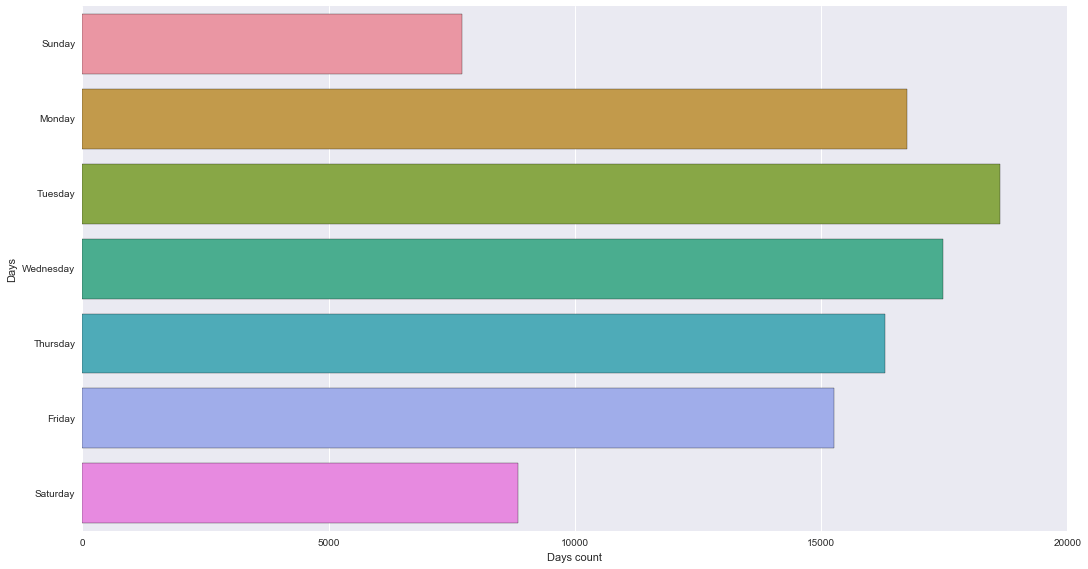

In [15]:
# Visualize average counts by day
days = df['DayOfWeek'].unique()
total_count_by_day = []
for day in days :
    total_count_by_day.append(df.loc[df['DayOfWeek'] == day, 'total'].mean() * 24)
factorPlot(total_count_by_day, days, 'Days count','Days')

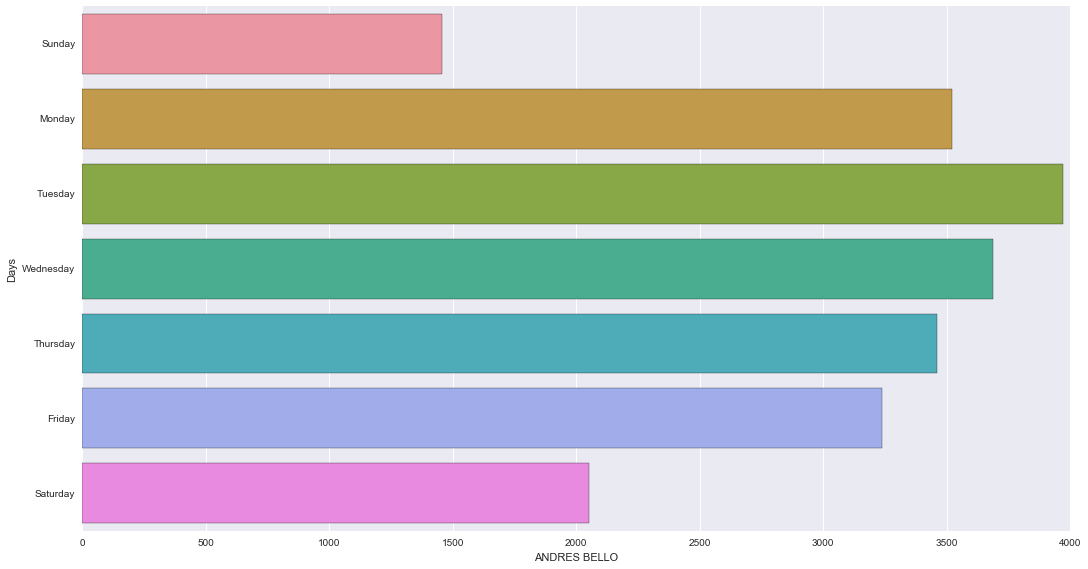

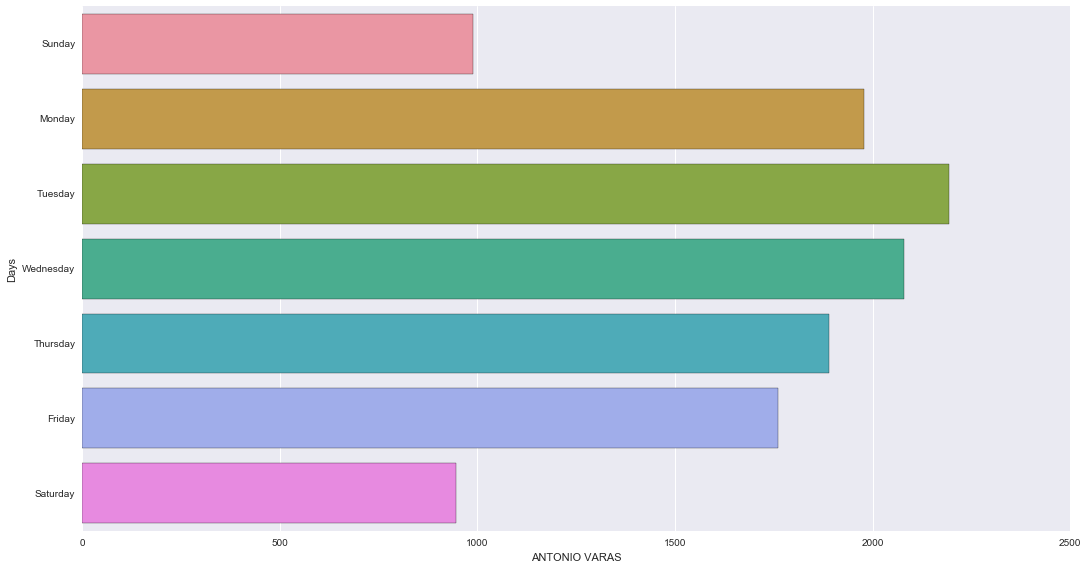

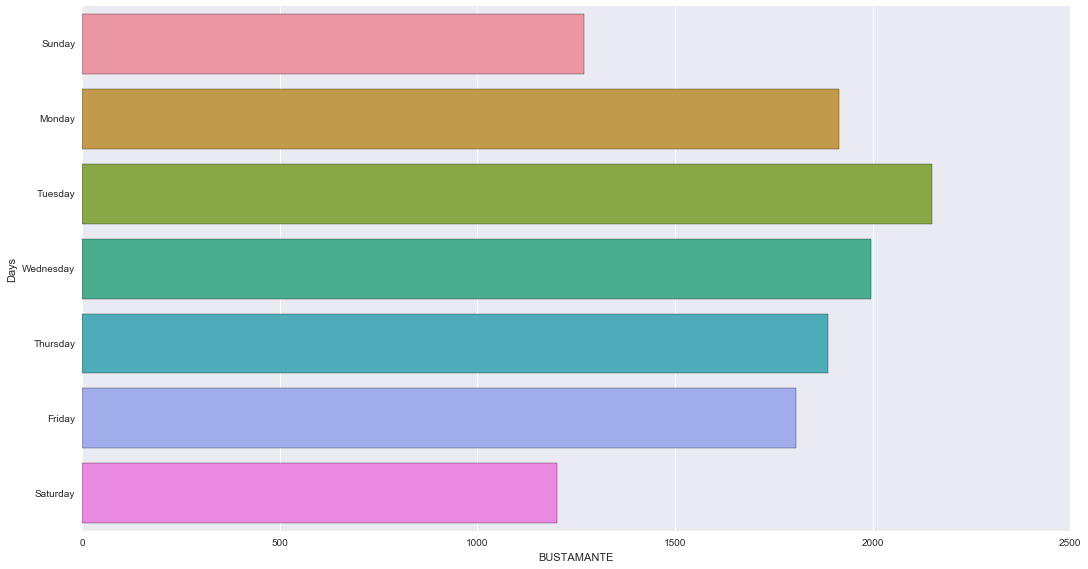

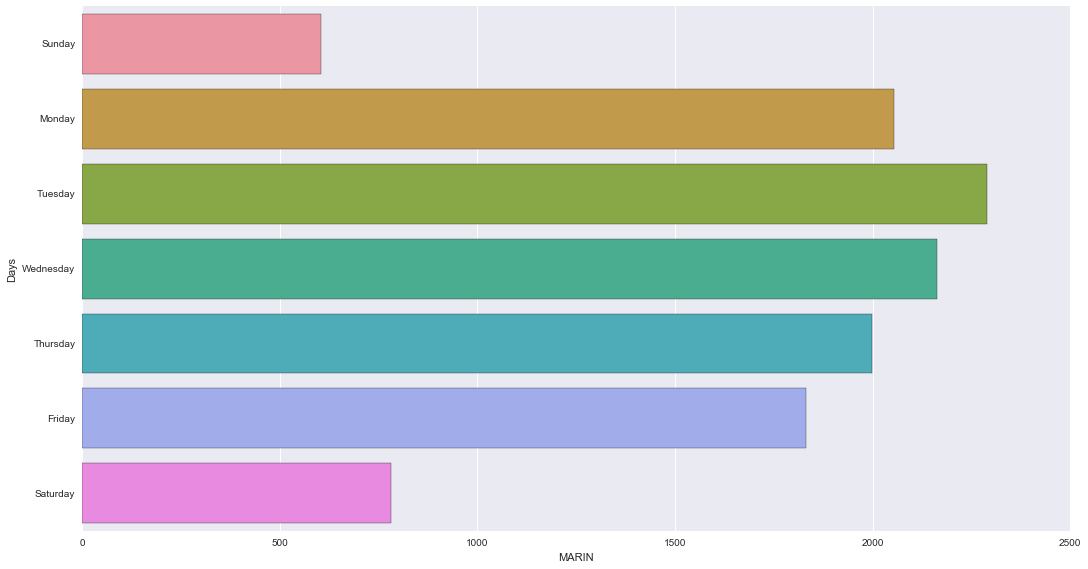

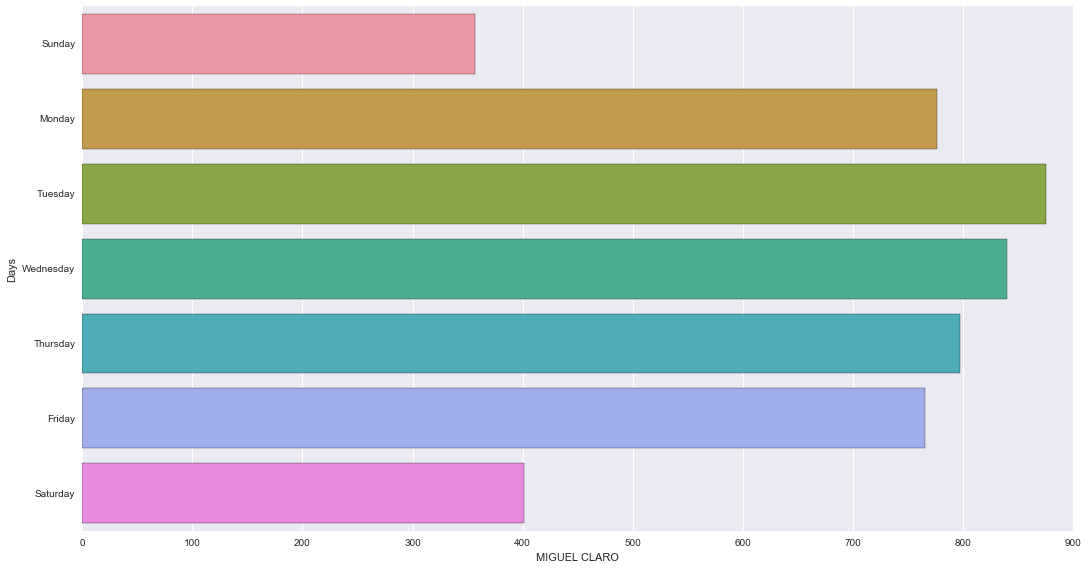

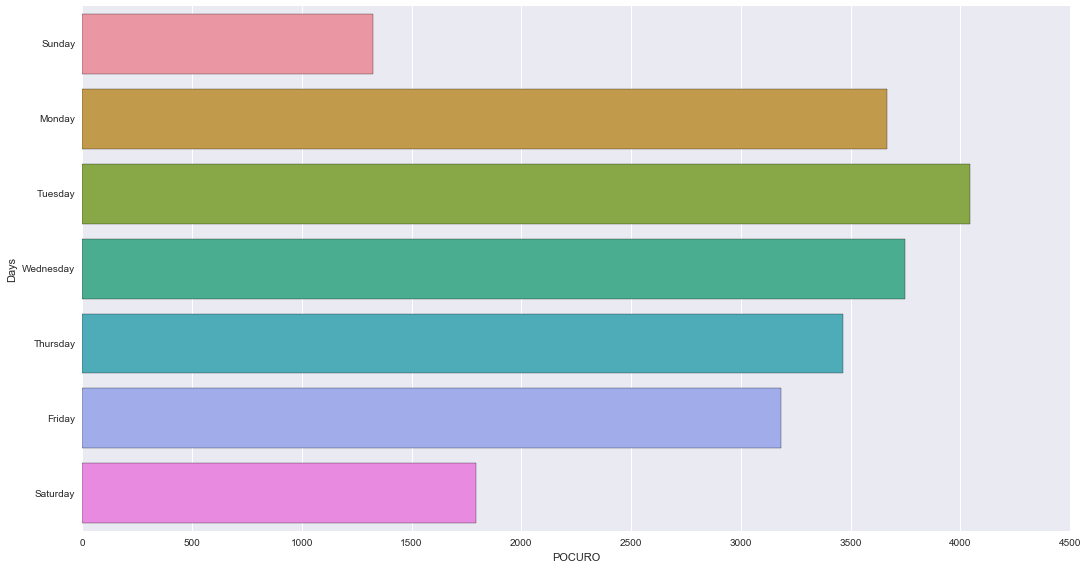

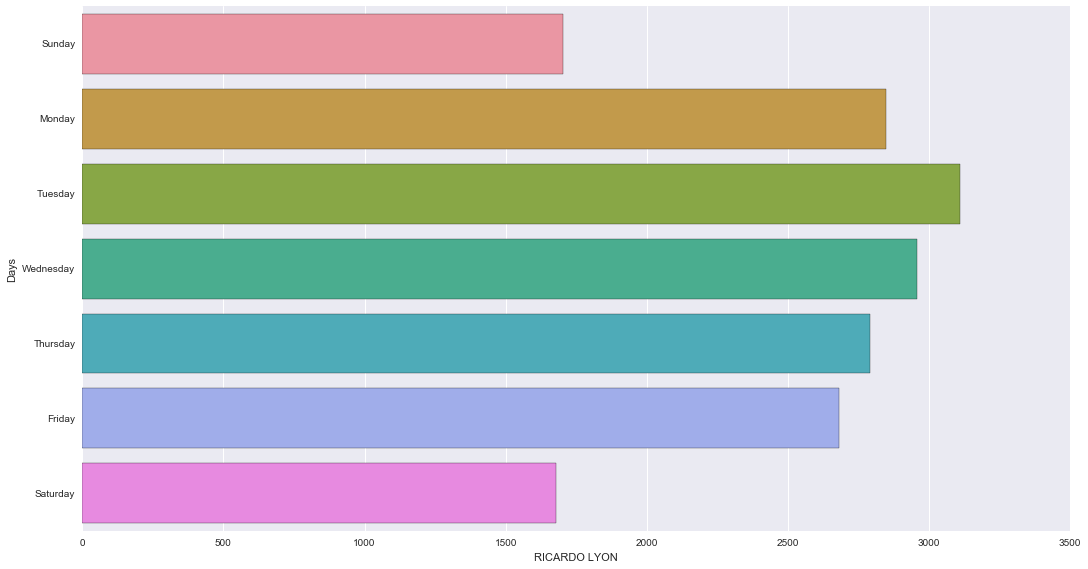

In [16]:
# visualize average counts by bikeways
for bike_way in bike_ways:
    total_count_by_day = []
    for day in days:
        bike_ways_by_day = df.loc[df['DayOfWeek'] == day, bike_way]
        total_count_by_day.append(bike_ways_by_day.mean() * 24)
        
    factorPlot(total_count_by_day, days, bike_way, 'Days')


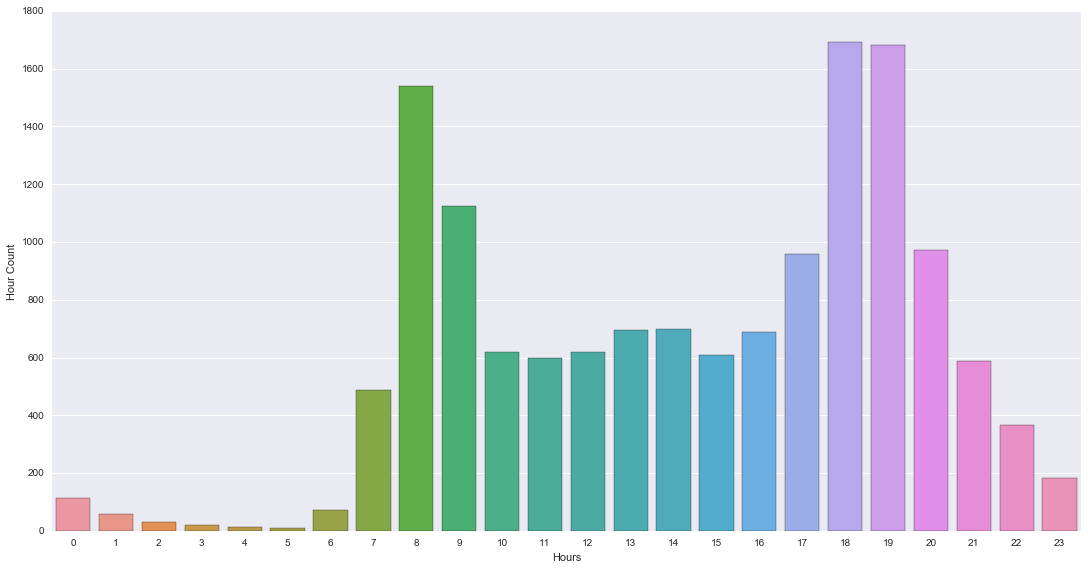

In [17]:
# Visualize total counts by hour
hours = df['Hour'].unique()
total_count_by_hour = []
for hour in hours:
    total_count_by_hour.append(df.loc[df['Hour'] == hour, 'total'].mean())
factorPlot(hours, total_count_by_hour, 'Hours','Hour Count')

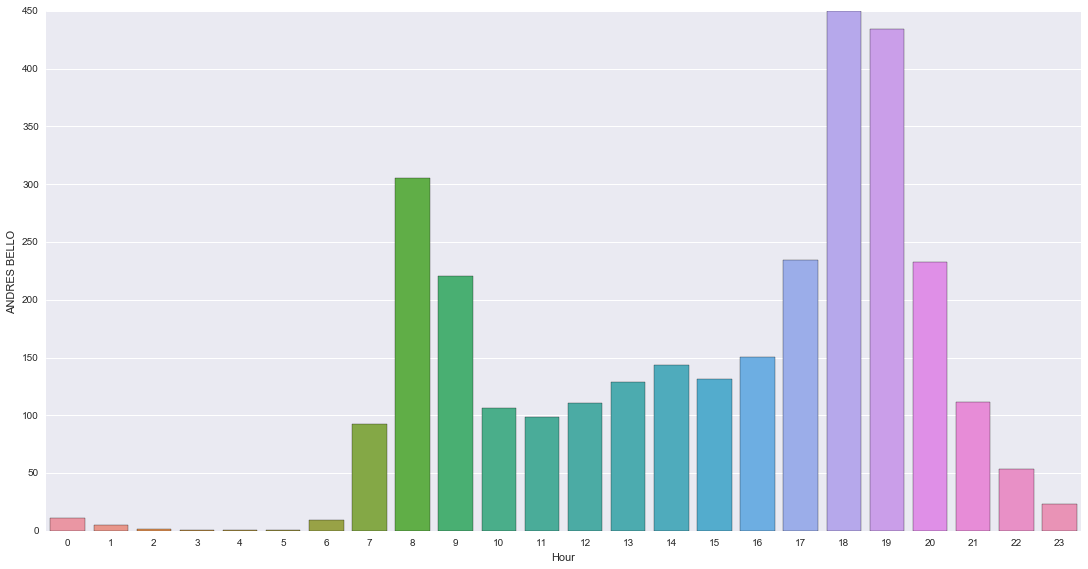

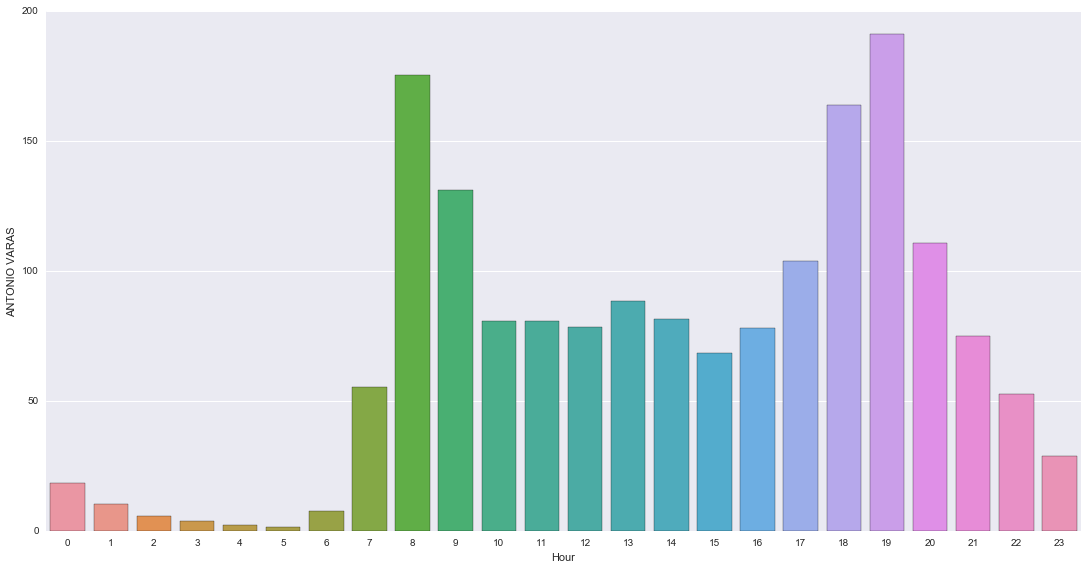

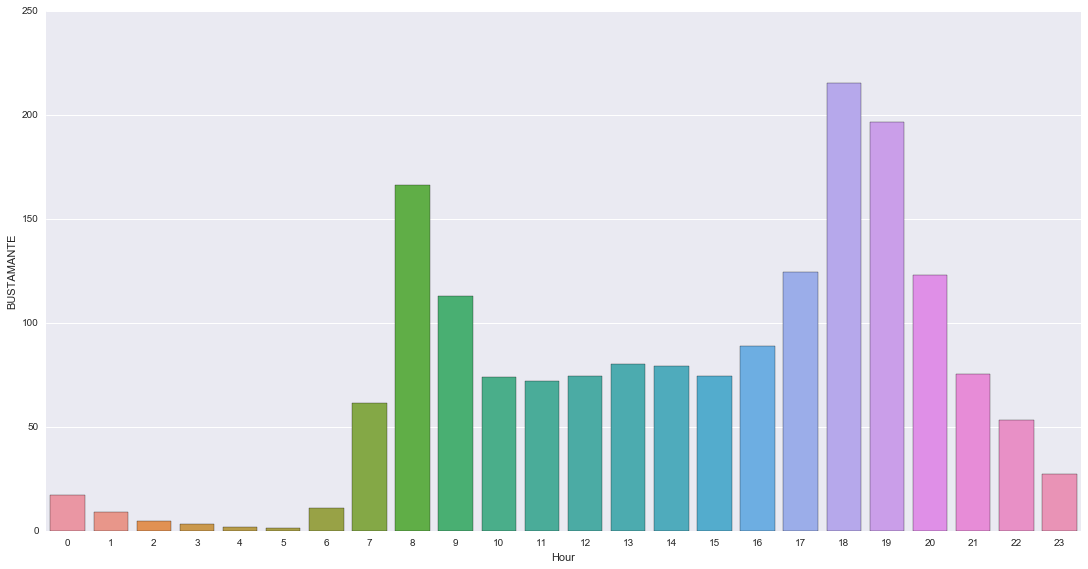

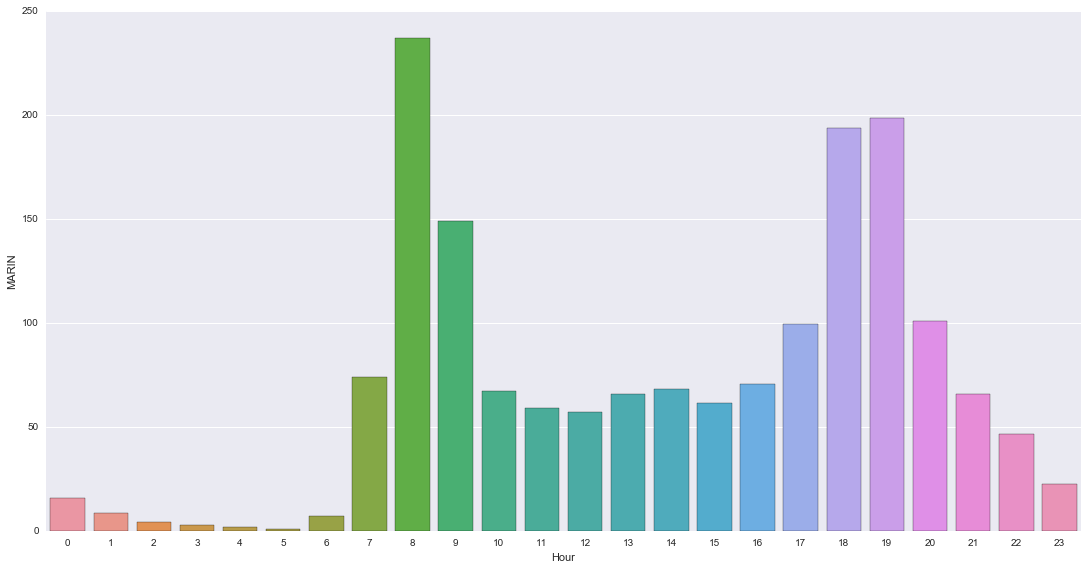

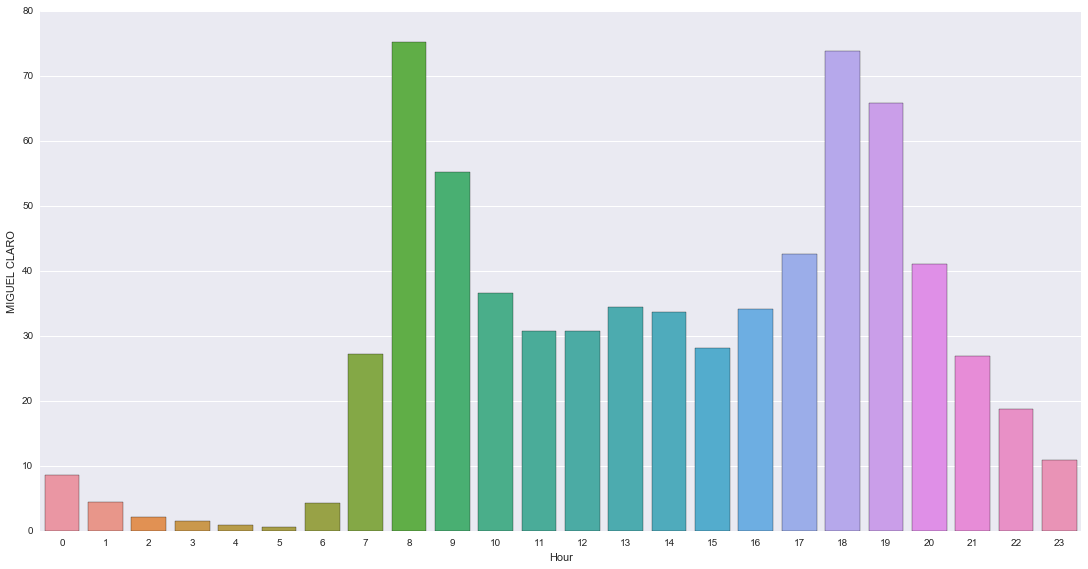

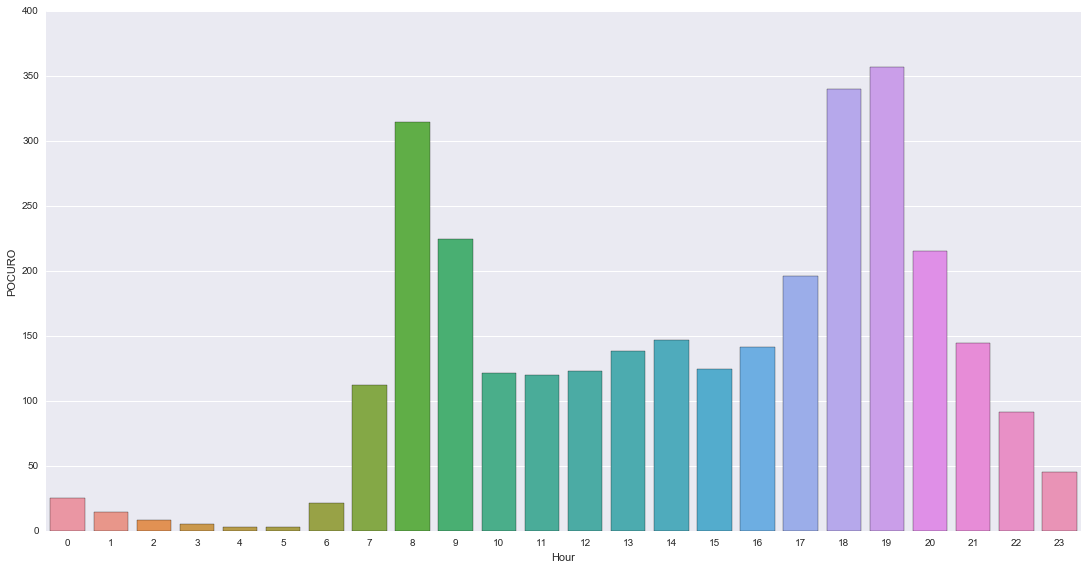

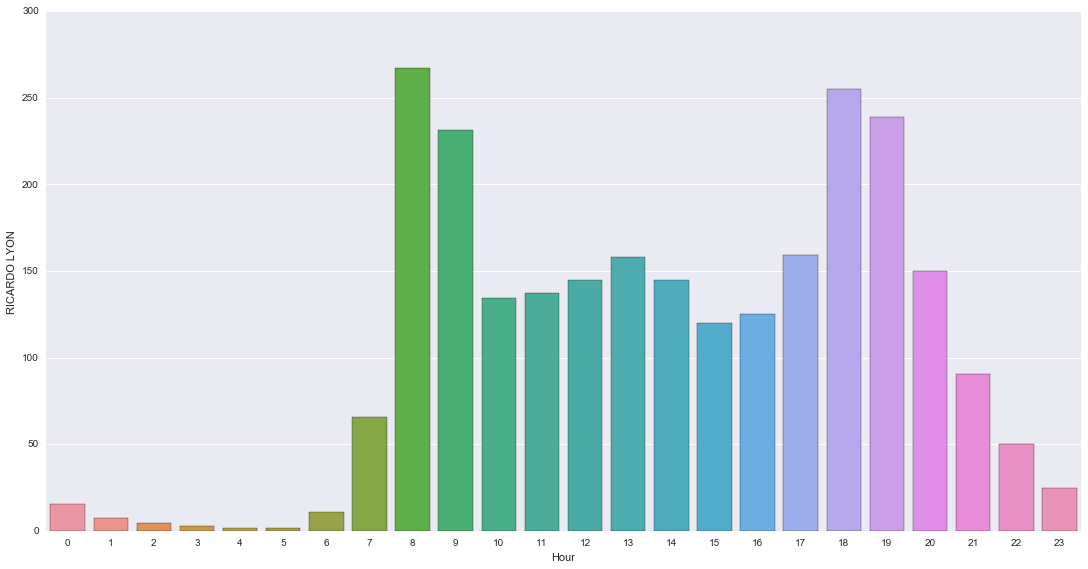

In [18]:
# visualize total counts by bikeways
for bike_way in bike_ways:
    total_count_by_hour = []
    for hour in hours:
        total_count_by_hour.append(df.loc[df['Hour'] == hour, bike_way].mean())
        
    factorPlot(hours, total_count_by_hour, 'Hour', bike_way)

# Predict total bikers in a bikeway given a date

In [21]:
# It's useful to create training and test data
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score;

def evaluate(alg, X_2, Y_2):
    score = alg.score(X_2, Y_2)
    print("accuracy: " + str(round(score * 100, 2)) + "%")

def test_alg(feature_data, targets, alg):
    for target in targets:
        X_1, X_2, Y_1, Y_2 = train_test_split(feature_data, 
                                              df[target], 
                                              test_size=0.5, 
                                              random_state=0)
        alg.fit(X_1, Y_1)
        print("Evaluating: " + target)
        evaluate(alg, X_2, Y_2)


/home/jotase/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# The columns we'll use to predict the target
features = ["date_delta"]

# Select our targets
targets = bike_ways

In [23]:
# Evaluate Linear regression

# LinearRegression
from sklearn.linear_model import LinearRegression

test_alg(df[features], targets, LinearRegression())

Evaluating: ANDRES BELLO
accuracy: 0.07%
Evaluating: ANTONIO VARAS
accuracy: -0.05%
Evaluating: BUSTAMANTE
accuracy: -0.03%
Evaluating: MARIN
accuracy: -0.03%
Evaluating: MIGUEL CLARO
accuracy: 7.53%
Evaluating: POCURO
accuracy: -0.07%
Evaluating: RICARDO LYON
accuracy: 0.06%


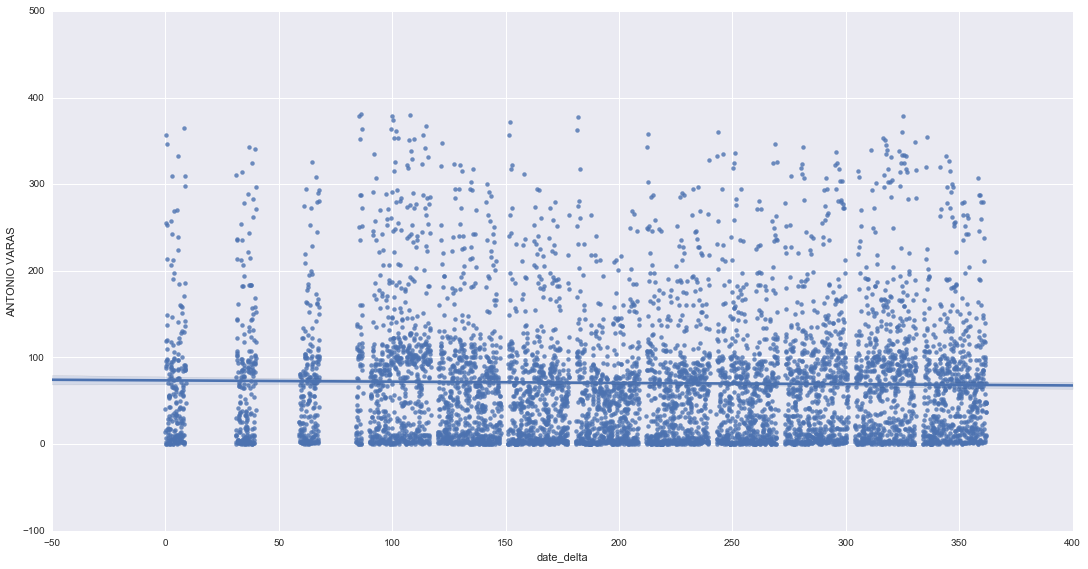

In [24]:
def plot_data(x_name, y_name, data):
    sns.lmplot(x=x_name, y=y_name, data=data,size=8, aspect=1.9);
    
plot_data("date_delta", "ANTONIO VARAS", df[['date_delta', 'ANTONIO VARAS']])


In [25]:
# Encode days of week to use it as feature
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
days_encoded = le.fit_transform(days)
print(days_encoded)

[3 1 5 6 4 0 2]


In [26]:
# Create a column "days_encoded"
df['days_encoded'] = le.fit_transform(df['DayOfWeek'])
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total,date,date_delta,days_encoded
0,29/03/2015 00:00,8,20.0,38.0,17,0.0,31,18,Sunday,0,132.0,2015-03-29 00:00:00,84.000000,3
1,29/03/2015 01:00,6,21.0,14.0,14,0.0,20,13,Sunday,1,88.0,2015-03-29 01:00:00,84.041667,3
2,29/03/2015 02:00,1,13.0,6.0,11,0.0,24,10,Sunday,2,65.0,2015-03-29 02:00:00,84.083333,3
3,29/03/2015 03:00,3,10.0,6.0,11,0.0,10,9,Sunday,3,49.0,2015-03-29 03:00:00,84.125000,3
4,29/03/2015 04:00,1,6.0,4.0,4,0.0,11,3,Sunday,4,29.0,2015-03-29 04:00:00,84.166667,3


In [27]:
# Change features by split date
features = ['Hour', 'days_encoded']

# Test again
test_alg(df[features], targets, LinearRegression())

Evaluating: ANDRES BELLO
accuracy: 15.28%
Evaluating: ANTONIO VARAS
accuracy: 15.39%
Evaluating: BUSTAMANTE
accuracy: 18.88%
Evaluating: MARIN
accuracy: 9.23%
Evaluating: MIGUEL CLARO
accuracy: 5.43%
Evaluating: POCURO
accuracy: 15.97%
Evaluating: RICARDO LYON
accuracy: 12.5%


In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) # Hour and Day of Week

fixed_features = poly.fit_transform(df[features])

test_alg(fixed_features, targets, LinearRegression())

Evaluating: ANDRES BELLO
accuracy: 24.49%
Evaluating: ANTONIO VARAS
accuracy: 28.42%
Evaluating: BUSTAMANTE
accuracy: 29.03%
Evaluating: MARIN
accuracy: 20.53%
Evaluating: MIGUEL CLARO
accuracy: 11.61%
Evaluating: POCURO
accuracy: 27.35%
Evaluating: RICARDO LYON
accuracy: 33.69%


In [29]:
print(fixed_features)

[[   1.    0.    3.    0.    0.    9.]
 [   1.    1.    3.    1.    3.    9.]
 [   1.    2.    3.    4.    6.    9.]
 ..., 
 [   1.   21.    4.  441.   84.   16.]
 [   1.   22.    4.  484.   88.   16.]
 [   1.   23.    4.  529.   92.   16.]]


In [30]:
print(df[features])

      Hour  days_encoded
0        0             3
1        1             3
2        2             3
3        3             3
4        4             3
5        5             3
6        6             3
7        7             3
8        8             3
9        9             3
10      10             3
11      11             3
12      12             3
13      13             3
14      14             3
15      15             3
16      16             3
17      17             3
18      18             3
19      19             3
20      20             3
21      21             3
22      22             3
23      23             3
24       0             1
25       1             1
26       2             1
27       3             1
28       4             1
29       5             1
...    ...           ...
6642    18             6
6643    19             6
6644    20             6
6645    21             6
6646    22             6
6647    23             6
6648     0             4
6649     1             4


In [31]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}

alg = ensemble.GradientBoostingRegressor(**params)

test_alg(fixed_features, targets, alg)

Evaluating: ANDRES BELLO
accuracy: 80.7%
Evaluating: ANTONIO VARAS
accuracy: 79.04%
Evaluating: BUSTAMANTE
accuracy: 78.97%
Evaluating: MARIN
accuracy: 82.32%
Evaluating: MIGUEL CLARO
accuracy: 25.71%
Evaluating: POCURO
accuracy: 78.4%
Evaluating: RICARDO LYON
accuracy: 80.82%
